# Basic usage of the ``empix`` library #

## A NOTE BEFORE STARTING ##

Since the ``empix`` git repository tracks this notebook under its original
basename ``basic_usage.ipynb``, we recommend that you copy the original notebook
and rename it to any other basename that is not one of the original basenames
that appear in the ``<root>/examples`` directory before executing any of the
notebook cells below, where ``<root>`` is the root of the ``empix``
repository. This way you can explore the notebook by executing and modifying
cells without changing the original notebook, which is being tracked by git.

## Table of contents ##

- [Import necessary modules](#Import-necessary-modules)
- [Introduction](#Introduction)
- [Using the ``empix`` library](#Using-the-empix-library)
  - [Creating the input ``hyperspy`` signals](#Creating-the-input-hyperspy-signals)
  - [Calculating the modulus squared](#Calculating-the-modulus-squared)
  - [Azimuthally averaging](#Azimuthally-averaging)
  - [Azimuthally integrating](#Azimuthally-integrating)
  - [Annularly averaging](#Annularly-averaging)
  - [Annularly integrating](#Annularly-integrating)
  - [Cropping](#Cropping)
  - [Downsampling](#Downsampling)
  - [Resampling](#Resampling)
  - [Cumulatively integrating 1D signals](#Cumulatively-integrating-1D-signals)

## Import necessary modules ##

In [1]:
# For closing figures.
import matplotlib.pyplot as plt



# The library that is the subject of this demonstration. Users may receive a
# warning message about ``pyopencl`` upon importing ``empix``. This message can
# be safely ignored.
import empix

# For generating data to be used in this demonstration. Users need not focus on
# the implementation details of this module in order to follow the logic of each
# cell in the remainder of this notebook. Morevoer, users need not import this
# module for their own applications of ``empix``.
import helpers_for_basic_usage as helpers

## Introduction ##

In this notebook, we demonstrate how one can use each function and class in the
``empix`` library.

In order to execute the cells in this notebook as intended, a set of Python
libraries need to be installed in the Python environment within which the cells
of the notebook are to be executed. For this particular notebook, users need to
install:

    empix
    jupyter
    ipympl

Users can install these libraries either via `pip`:

    pip install empix[examples]

or `conda`:

    conda install -y empix jupyter ipympl -c conda-forge

You can find the documentation for the ``empix`` library
[here](https://mrfitzpa.github.io/empix/_autosummary/empix.html). It is
recommended that you consult the documentation of this library as you explore
the notebook. Moreover, users should execute the cells in the order that they
appear, i.e. from top to bottom, as some cells reference variables that are set
in other cells above them. **Users should make sure to navigate the
documentation for the version of ``empix`` that they are currently using.**

The last module that we imported above (i.e. the module with the alias helpers)
contains helper functions that are used throughout the remainder of the
notebook, specifically to generate data to be used in this demonstration. It is
not essential that users know the implementation details of these helper
functions in order to follow the logic of each cell in the remainder of this
notebook. Moreover, users need not import this module for their own applications
of ``empix``. That being said, if any users are interested in the implementation
details, they can find them in the file
`<root>/examples/helpers_for_basic_usage.py`.

## Using the ``empix`` library ##

### Creating the input ``hyperspy`` signals ###

Let's create two 2D ``hyperspy`` signals to use as input signals for most of the
functions in the ``empix`` library.

In [2]:
real_2d_input_signal = helpers.generate_real_2d_input_signal()
complex_2d_input_signal = helpers.generate_complex_2d_input_signal()

Let's plot the 2D input signals that we just created. Starting with the 
real-valued signal.

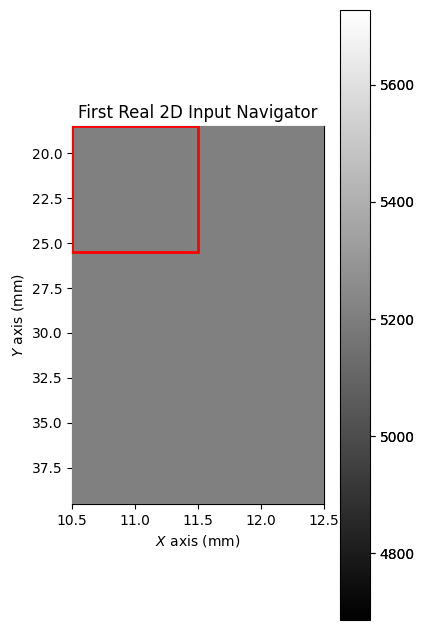

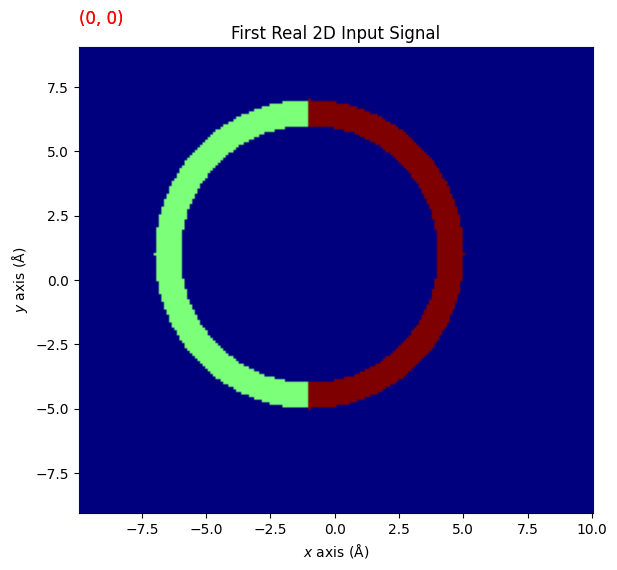

In [3]:
%matplotlib ipympl

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
real_2d_input_signal.plot(**kwargs)

And now the complex-valued signal.

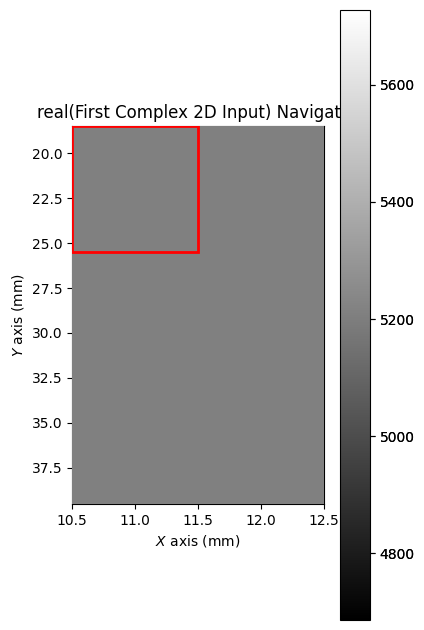

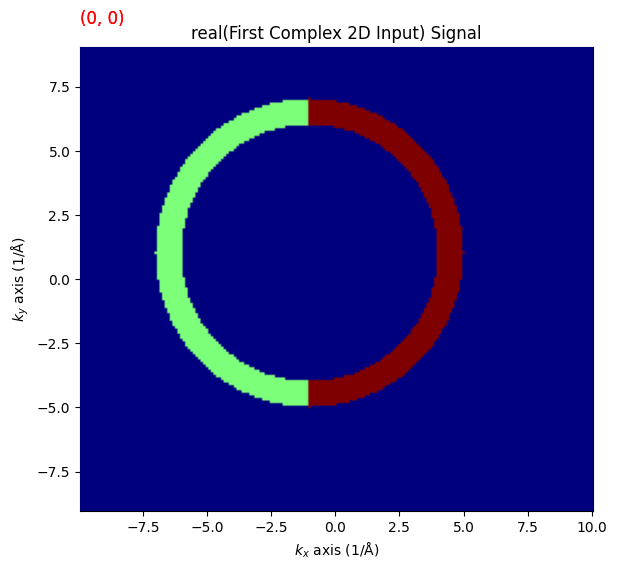

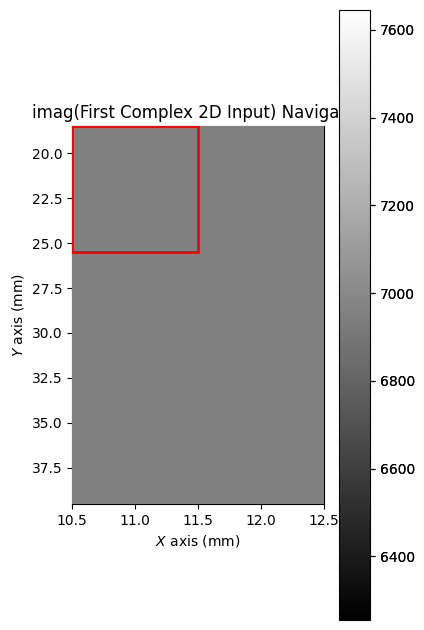

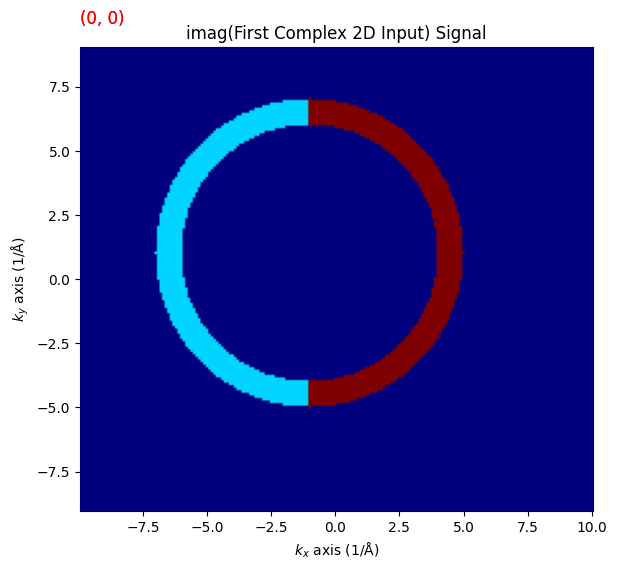

In [4]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
complex_2d_input_signal.plot(**kwargs)

Note that we modified the signal axes from their default states. In particular,
we rescaled the signal space axes scales by a factor of 10. The default/original
signal space scales were equal to unity.

Let's also create two 2D ``hyperspy`` signals to use as input signals for one 
of the functions in the ``empix`` library.

In [5]:
real_1d_input_signal = helpers.generate_real_1d_input_signal()
complex_1d_input_signal = helpers.generate_complex_1d_input_signal()

Let's plot the 1D input signals that we just created. Starting with the 
real-valued signal.

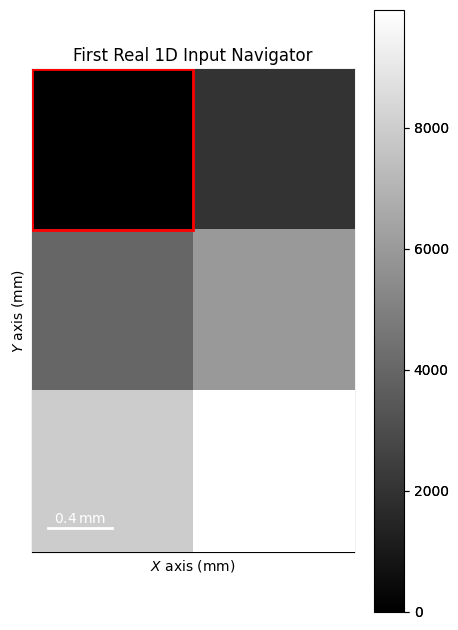

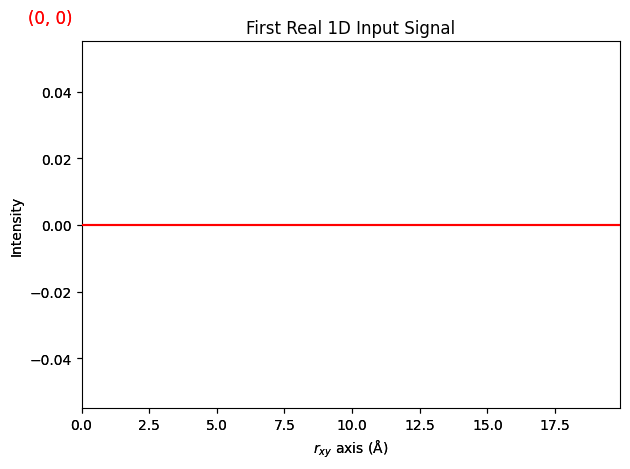

In [6]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
real_1d_input_signal.plot(**kwargs)

And now the complex-valued signal.

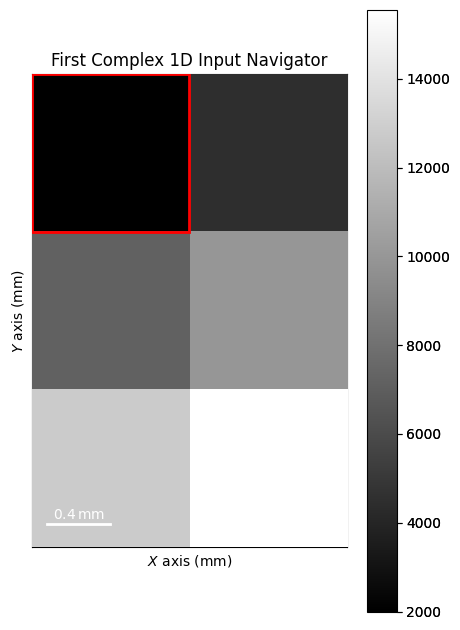

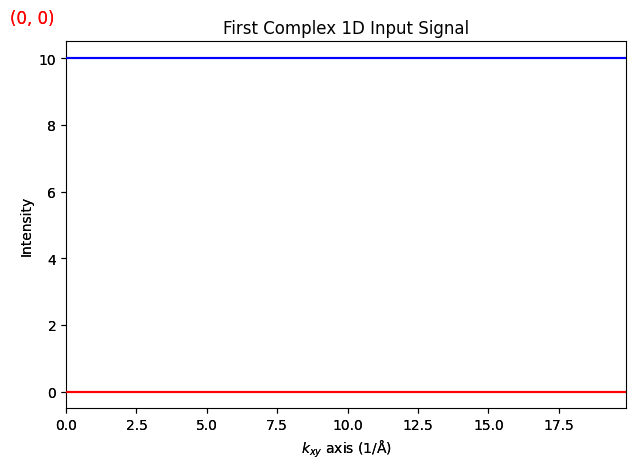

In [7]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
complex_1d_input_signal.plot(**kwargs)

### Calculating the modulus squared ###

Let's calculate the modulus squared of each input signal.

In [8]:
kwargs = {"input_signal": real_2d_input_signal, "title": "foobar"}
output_signal_1 = empix.abs_sq(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, "title": None}
output_signal_2 = empix.abs_sq(**kwargs)

kwargs = {"input_signal": real_1d_input_signal, "title": None}
output_signal_3 = empix.abs_sq(**kwargs)

kwargs = {"input_signal": complex_1d_input_signal, "title": None}
output_signal_4 = empix.abs_sq(**kwargs)

Let's plot the resulting output signals.

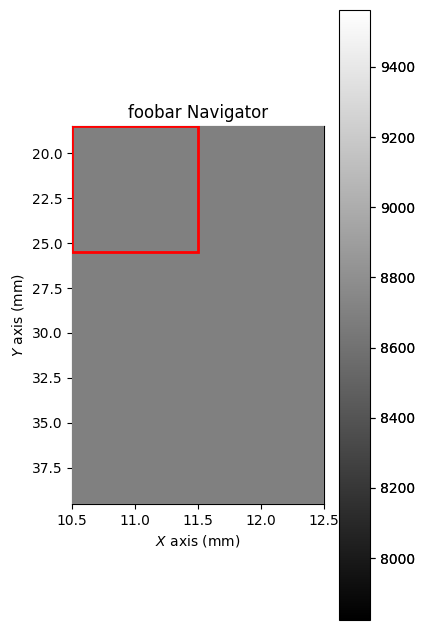

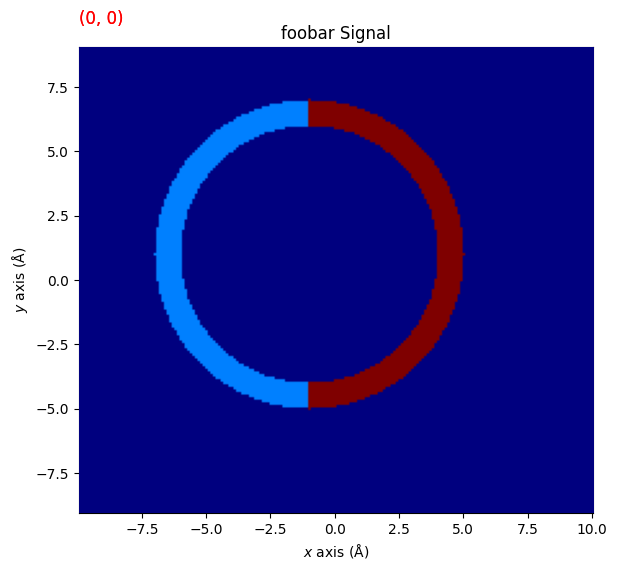

In [9]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

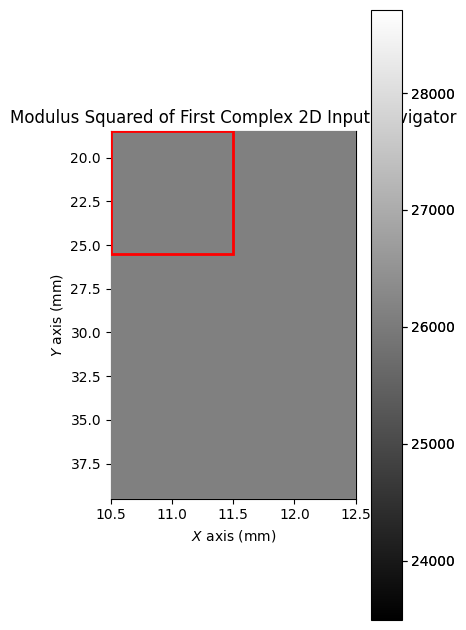

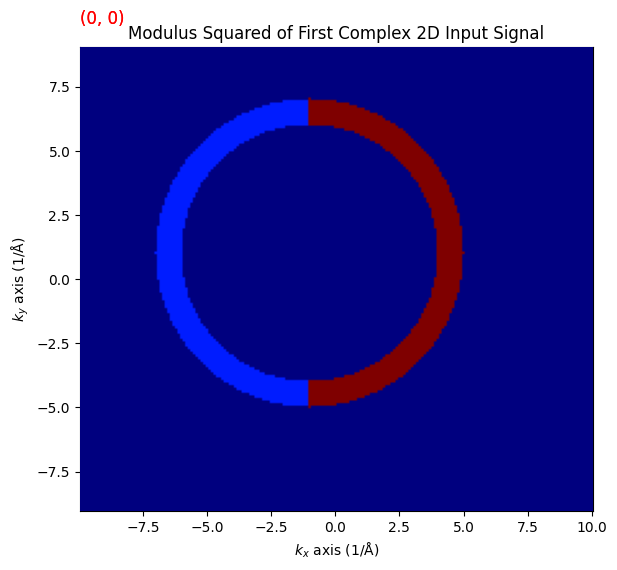

In [10]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

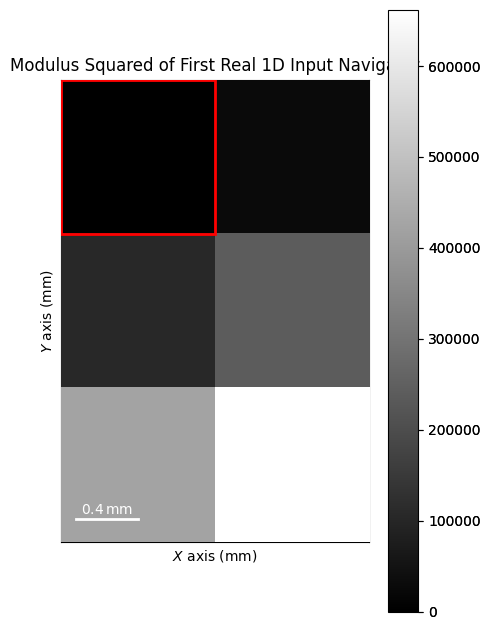

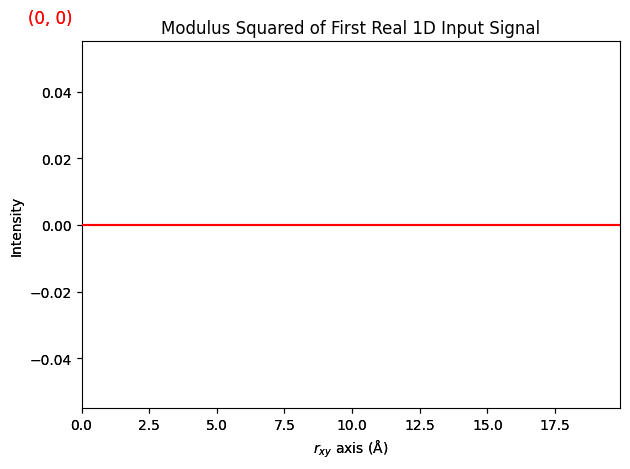

In [11]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_3.plot(**kwargs)

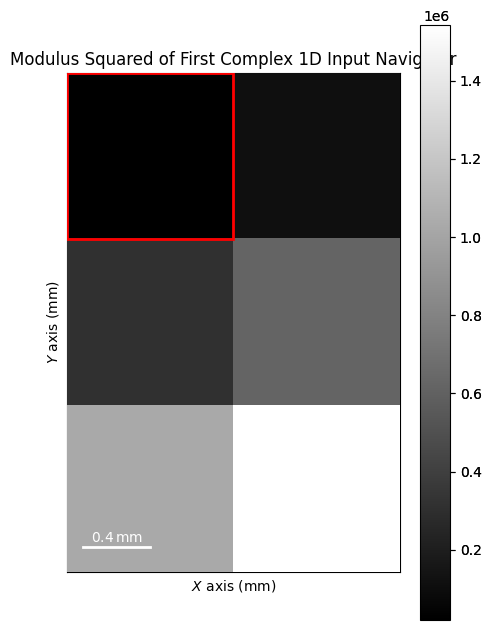

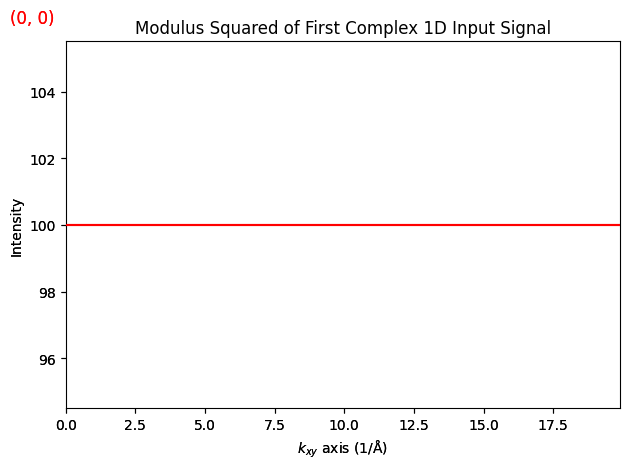

In [12]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_4.plot(**kwargs)

Note that for the first output signal, i.e. ``output_signal_1``, we overwrote
the automatically generated default title: rather than the title being
"Modulus Square of Real 2D Input", we chose the title to be "foobar".

Moreover, note that for each input signal, the metadata stored therein is copied
over to the corresponding output signal, with the title generally being modified
afterwards.

In [13]:
real_2d_input_signal.metadata

├── General
│   └── title = First Real 2D Input
├── Signal
│   └── signal_type = 
├── avg_imag_val_inside_ring = 0
├── avg_real_val_inside_ring = 1.5
├── inner_ring_radius = 5.0
├── inner_ring_radius_in_pixels = 50
├── max_imag_val_inside_ring = 0
├── max_real_val_inside_ring = 2
├── outer_ring_radius = 6.0
├── outer_ring_radius_in_pixels = 60
├── ring_centers = [[[-1.0, 1.0], [0.0, 1.0]], [[-1.0, 0.0], [0.0, 0.0]], [[-1.0, -1.0], [0.0, -1.0]]]
└── ring_centers_in_pixel_coords = [[[89, 80], [99, 80]], [[89, 90], [99, 90]], [[89, 100], [99, 100]]]

In [14]:
output_signal_1.metadata

├── General
│   └── title = foobar
├── Signal
│   └── signal_type = 
├── avg_imag_val_inside_ring = 0
├── avg_real_val_inside_ring = 1.5
├── inner_ring_radius = 5.0
├── inner_ring_radius_in_pixels = 50
├── max_imag_val_inside_ring = 0
├── max_real_val_inside_ring = 2
├── outer_ring_radius = 6.0
├── outer_ring_radius_in_pixels = 60
├── ring_centers = [[[-1.0, 1.0], [0.0, 1.0]], [[-1.0, 0.0], [0.0, 0.0]], [[-1.0, -1.0], [0.0, -1.0]]]
└── ring_centers_in_pixel_coords = [[[89, 80], [99, 80]], [[89, 90], [99, 90]], [[89, 100], [99, 100]]]

All ``empix`` functions will copy the metadata from the input signal into the
corresponding output signal and then update the title.

### Azimuthally averaging ###

Let's azimuthally average each 2D input signal using the same optional averaging
parameters.

In [15]:
# ``X_idx`` and ``Y_idx`` are x- and y-indices in navigation space.
Y_idx = 0
X_idx = 1

metadata = real_2d_input_signal.metadata
ring_centers = metadata.ring_centers
inner_ring_radius = metadata.inner_ring_radius
outer_ring_radius = metadata.outer_ring_radius

# ``ring_center`` and ``radial_range`` are in units of signal space axes.
ring_center = ring_centers[Y_idx][X_idx]
radial_range = (inner_ring_radius/2, outer_ring_radius+1)

num_bins = 180

kwargs = {"center": ring_center,
          "radial_range": radial_range,
          "num_bins": num_bins,
          "title": None}  # Automatically generate default title.
optional_params = empix.OptionalAzimuthalAveragingParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.azimuthally_average(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.azimuthally_average(**kwargs)

Let's plot the resulting output signals.

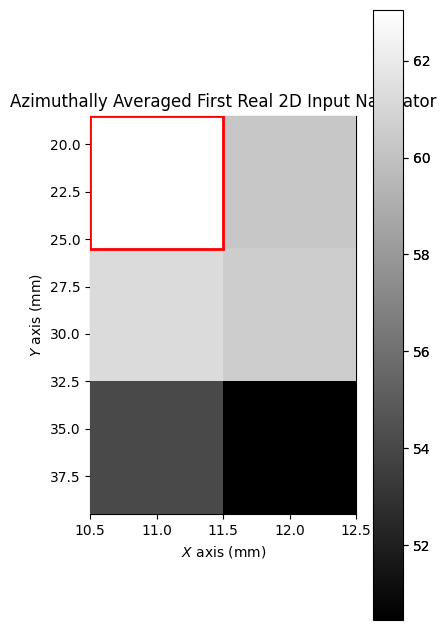

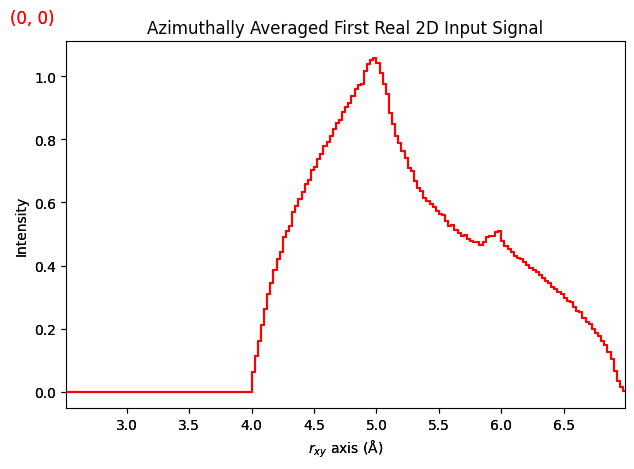

In [16]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

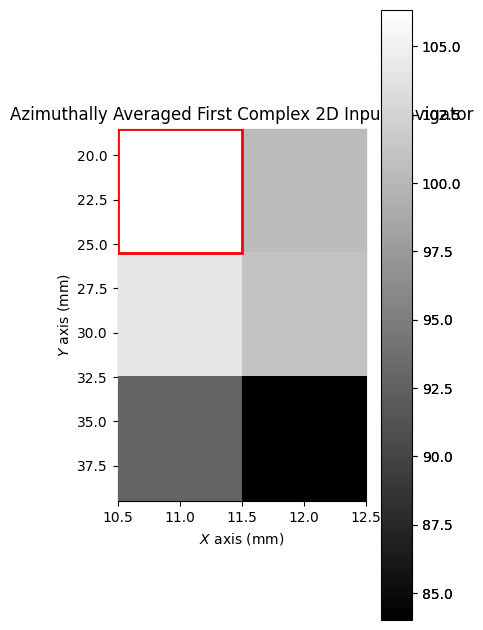

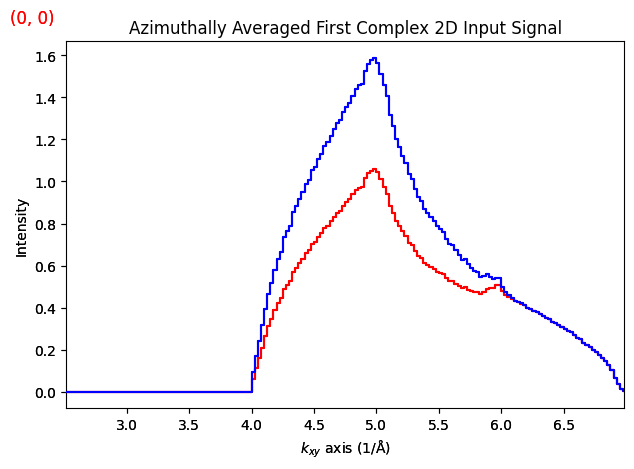

In [17]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Azimuthally integrating ###

Let's azimuthally integrate each 2D input signal using the same optional
integration parameters.

In [18]:
kwargs = {"center": ring_center,
          "radial_range": radial_range,
          "num_bins": num_bins,
          "title": None}
optional_params = empix.OptionalAzimuthalIntegrationParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.azimuthally_integrate(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.azimuthally_integrate(**kwargs)

Let's plot the resulting output signals.

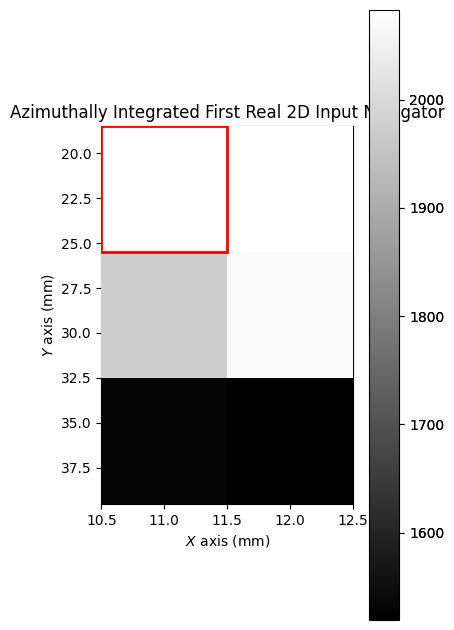

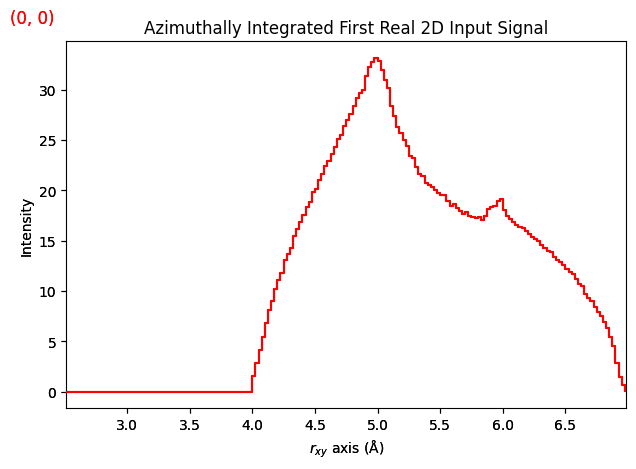

In [19]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

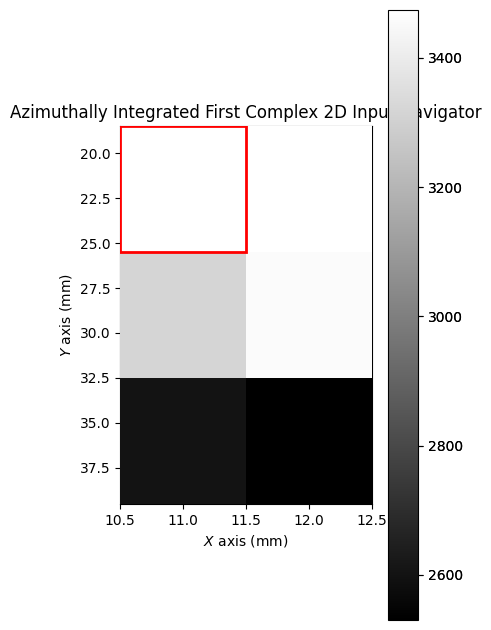

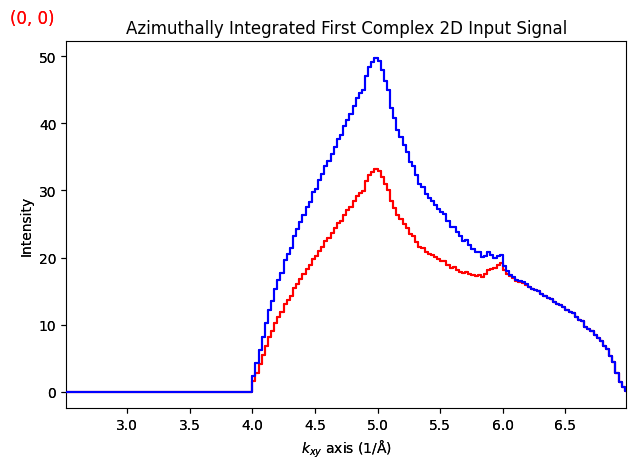

In [20]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Annularly averaging ###

Let's annularly average each 2D input signal using the same optional averaging
parameters.

In [21]:
kwargs = {"center": ring_center,
          "radial_range": radial_range,
          "title": None}
optional_params = empix.OptionalAnnularAveragingParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.annularly_average(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.annularly_average(**kwargs)

Let's plot the resulting output signals.

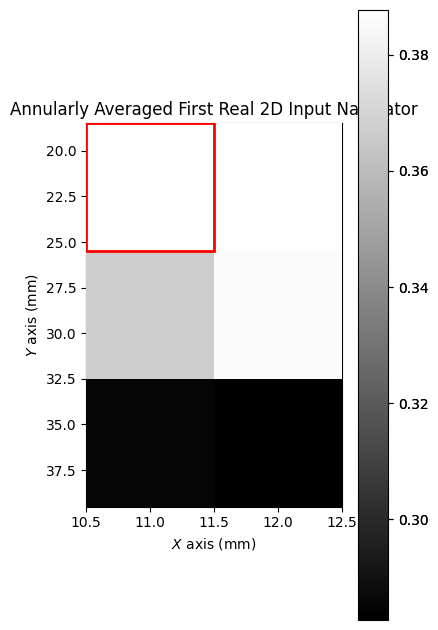

In [22]:
%matplotlib inline

plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

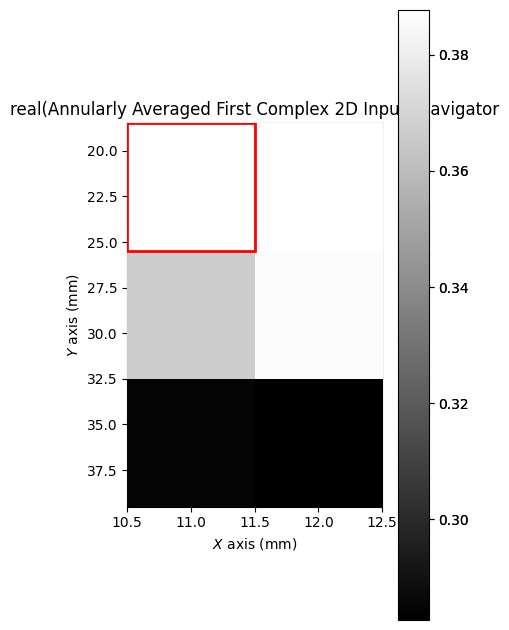

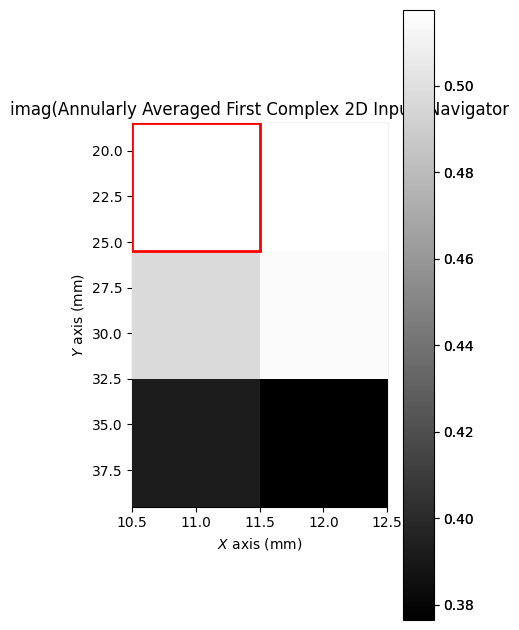

In [23]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Annularly integrating ###

Let's annularly average each 2D input signal using the same optional integration
parameters.

In [24]:
kwargs = {"center": ring_center,
          "radial_range": radial_range,
          "title": None}
optional_params = empix.OptionalAnnularIntegrationParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.annularly_integrate(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.annularly_integrate(**kwargs)

Let's plot the resulting output signals.

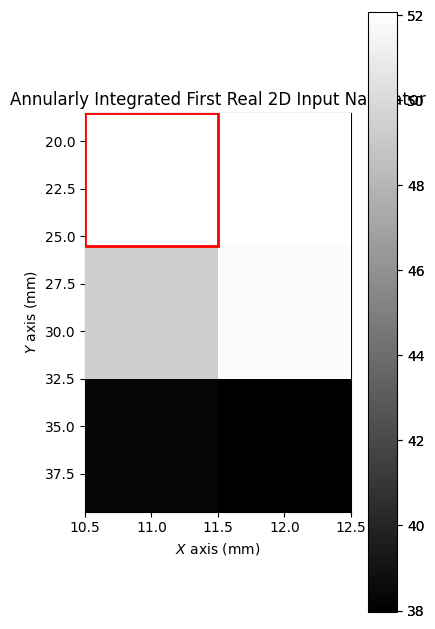

In [25]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

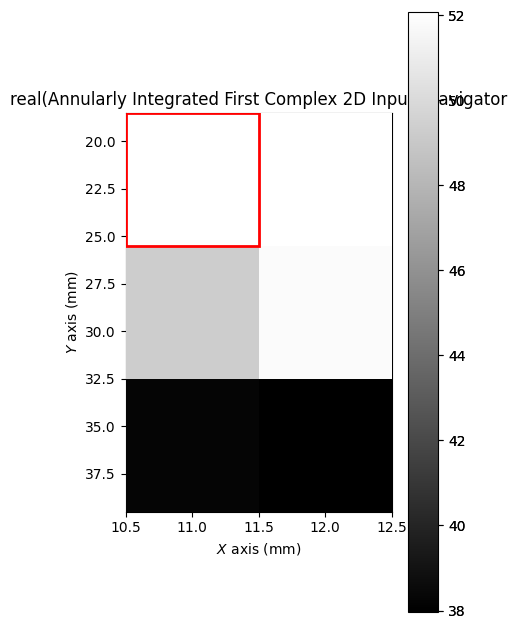

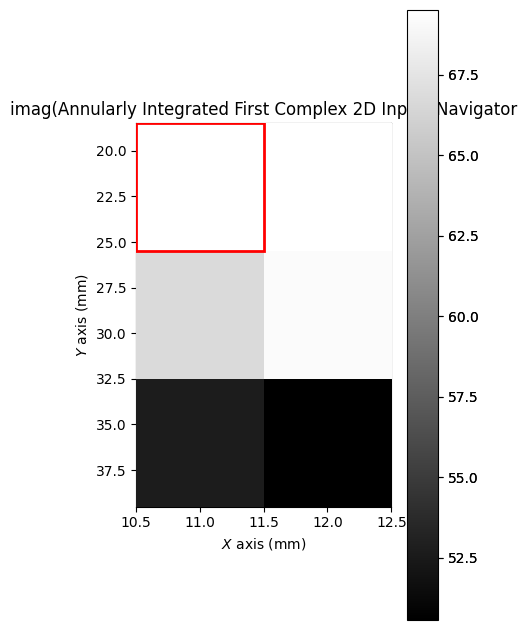

In [26]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Cropping ###

Let's crop each 2D input signal using the same optional cropping parameters.

In [27]:
kwargs = {"center": ring_center,
          "window_dims": (190, 185),
          "pad_mode": "zeros",
          "apply_symmetric_mask": True,
          "title": None}
optional_params = empix.OptionalCroppingParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.crop(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.crop(**kwargs)

Let's plot the resulting output signals.

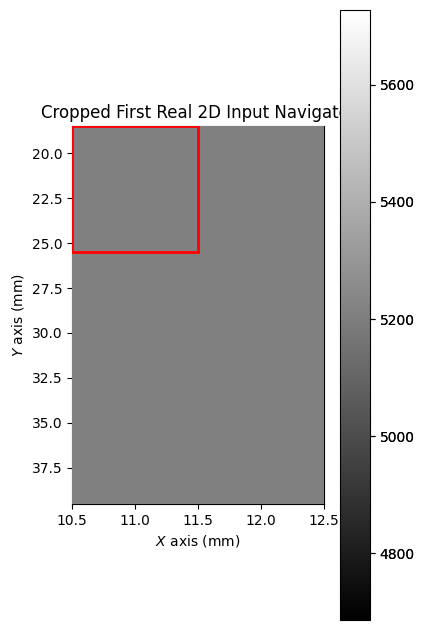

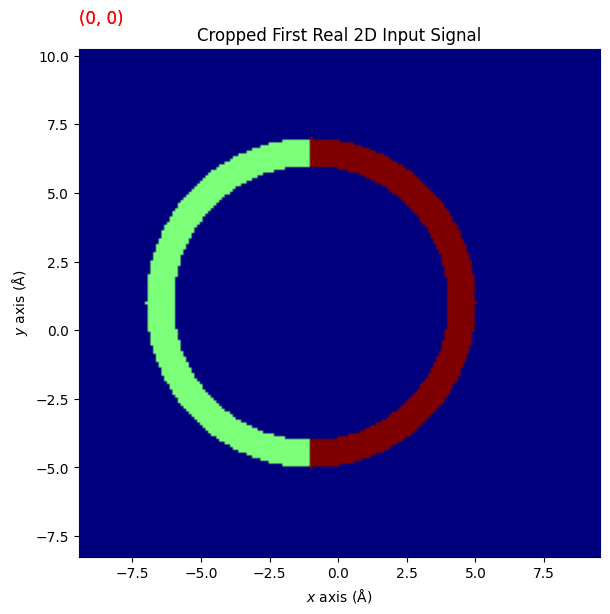

In [28]:
%matplotlib ipympl

plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

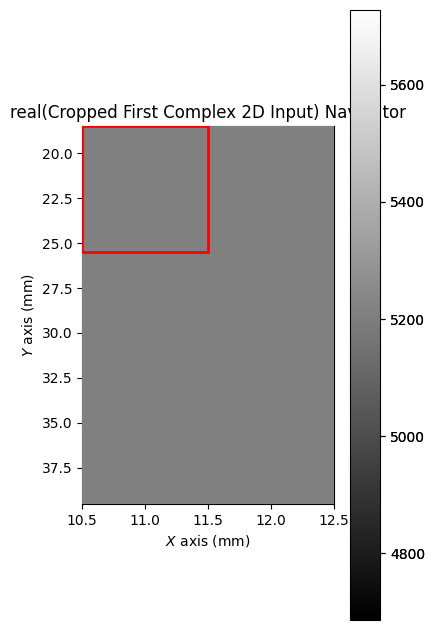

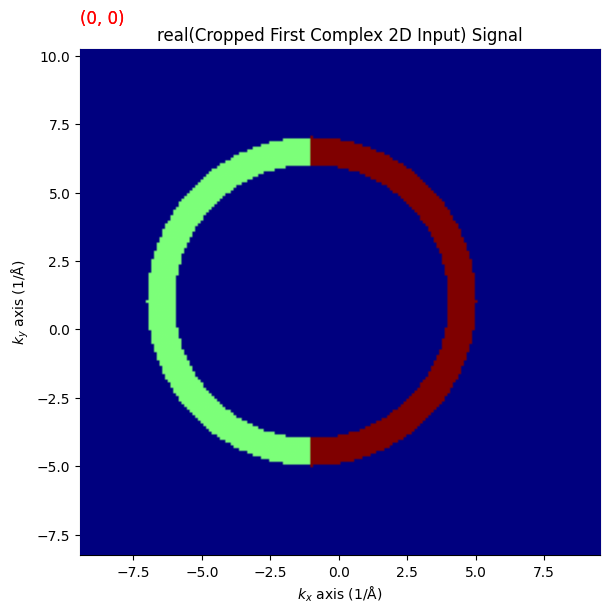

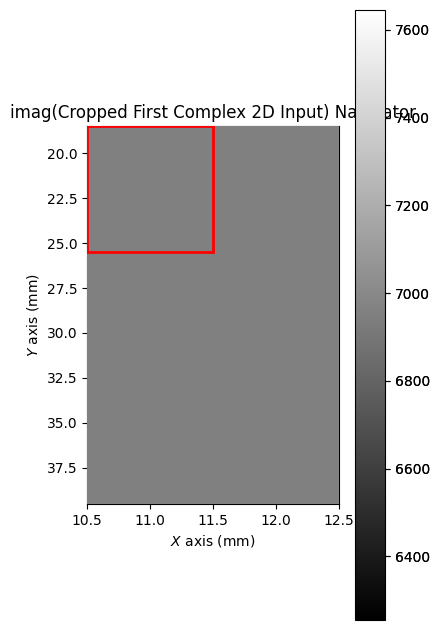

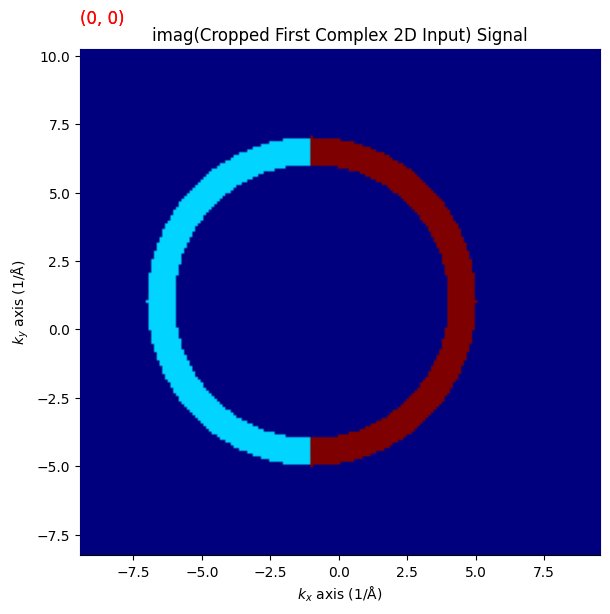

In [29]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Downsampling ###

Let's downsample each 2D input signal using the same optional cropping
parameters.

In [30]:
kwargs = {"block_dims": (2, 3),
          "padding_const": 0,
          "downsample_mode": "sum",
          "title": None}
optional_params = empix.OptionalDownsamplingParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.downsample(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.downsample(**kwargs)

Let's plot the resulting output signals.

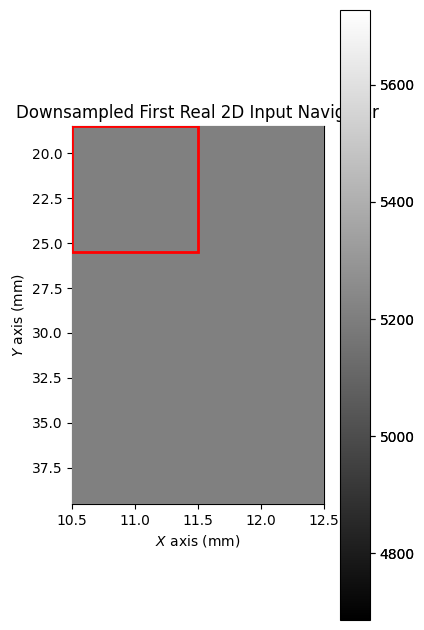

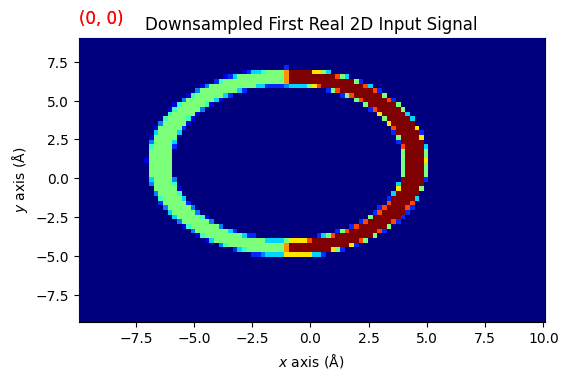

In [31]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

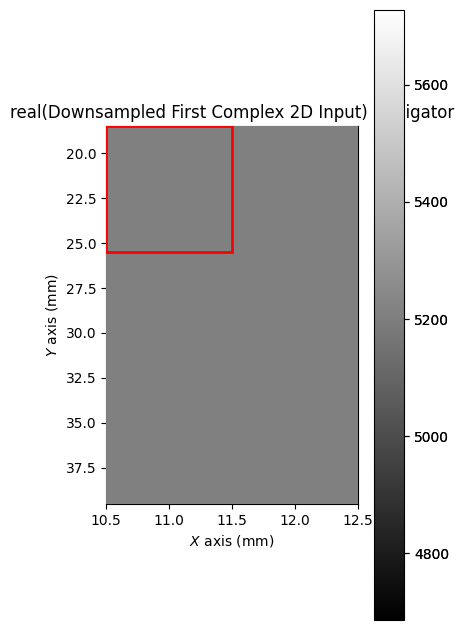

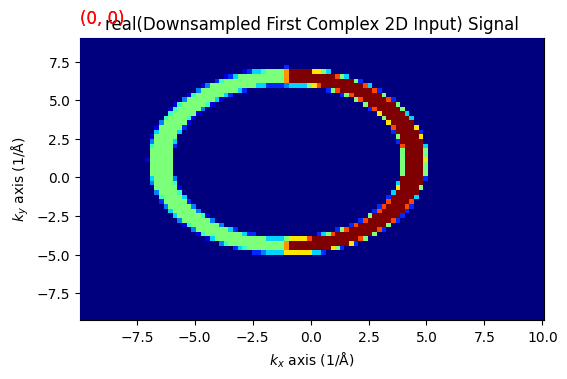

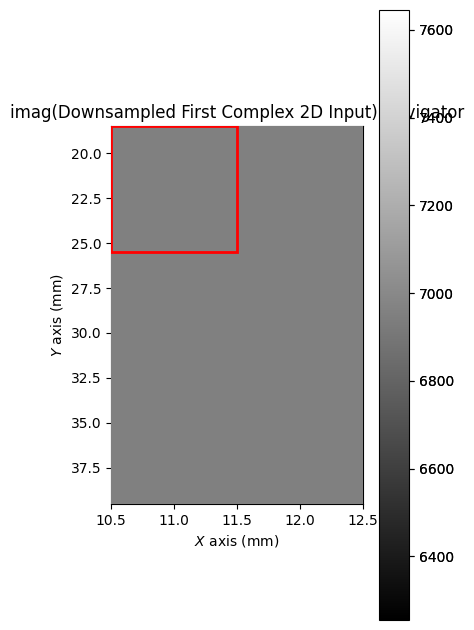

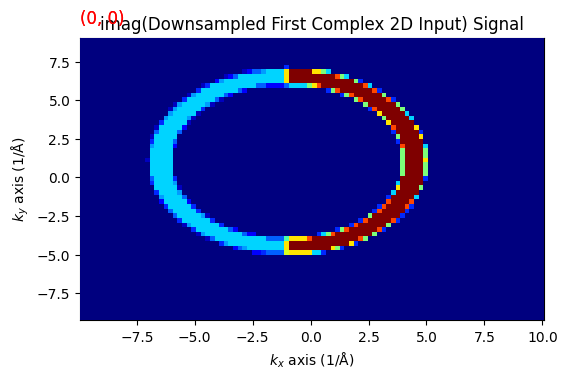

In [32]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Resampling ###

Let's resample each 2D input signal using the same optional resampling
parameters.

In [33]:
h_size = real_2d_input_signal.axes_manager[-2].size
h_scale = real_2d_input_signal.axes_manager[-2].scale
h_offset = real_2d_input_signal.axes_manager[-2].offset

v_size = real_2d_input_signal.axes_manager[-1].size
v_scale = real_2d_input_signal.axes_manager[-1].scale
v_offset = real_2d_input_signal.axes_manager[-1].offset

kwargs = {"new_signal_space_sizes": (2*h_size, 2*v_size),
          "new_signal_space_scales": (h_scale/2, v_scale/2),
          "new_signal_space_offsets": (h_offset+h_scale/2, v_offset+v_scale/2),
          "spline_degrees": (3, 3),
          "interpolate_polar_cmpnts": True,
          "title": None}
optional_params = empix.OptionalResamplingParams(**kwargs)

kwargs = {"input_signal": real_2d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.resample(**kwargs)

kwargs = {"input_signal": complex_2d_input_signal, 
          "optional_params": optional_params}
output_signal_2 = empix.resample(**kwargs)

Let's plot the resulting output signals.

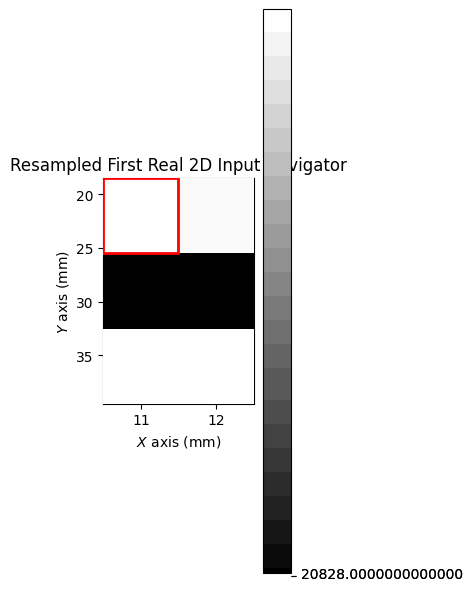

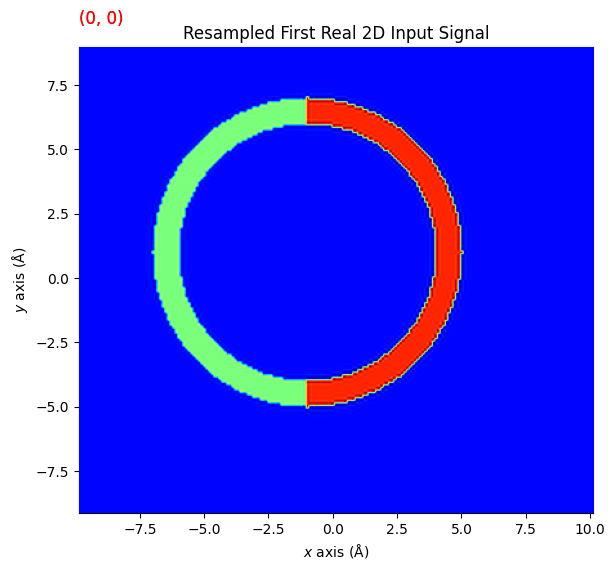

In [34]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)

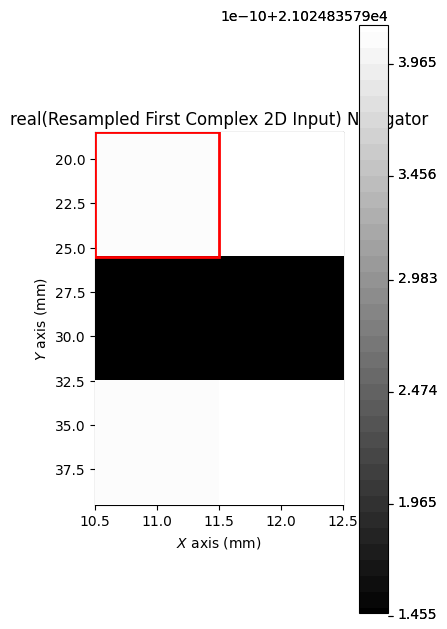

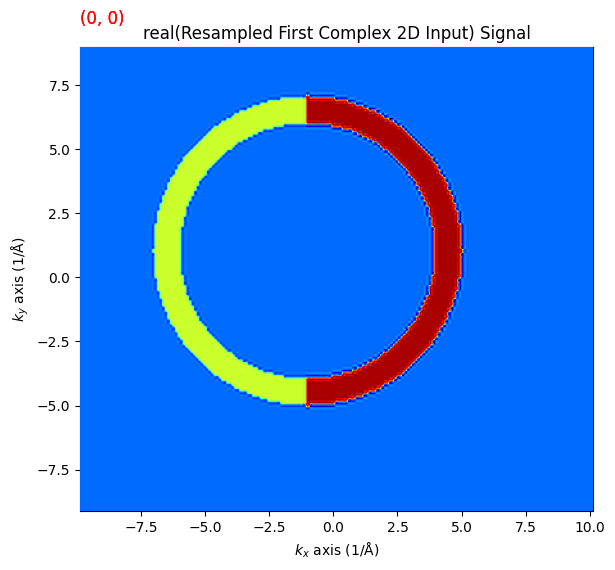

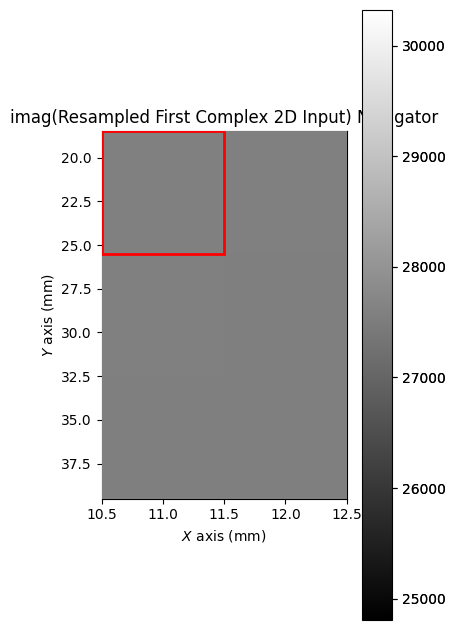

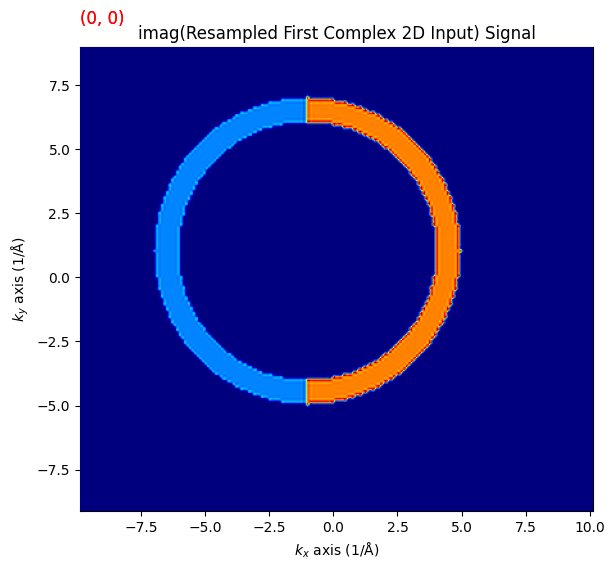

In [35]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_2.plot(**kwargs)

### Cumulatively integrating 1D signals ###

Let's cumulatively integrate the real 1D input signal.

In [36]:
u_size = real_1d_input_signal.axes_manager[-1].size
u_scale = real_1d_input_signal.axes_manager[-1].scale
u_offset = real_1d_input_signal.axes_manager[-1].offset

kwargs = {"limits": (u_offset+20*u_scale, u_offset+130*u_scale),
          "num_bins": num_bins,
          "normalize": True,
          "title": None}
optional_params = empix.OptionalCumulative1dIntegrationParams(**kwargs)

kwargs = {"input_signal": real_1d_input_signal, 
          "optional_params": optional_params}
output_signal_1 = empix.cumulatively_integrate_1d(**kwargs)

Let's plot the resulting output signal.

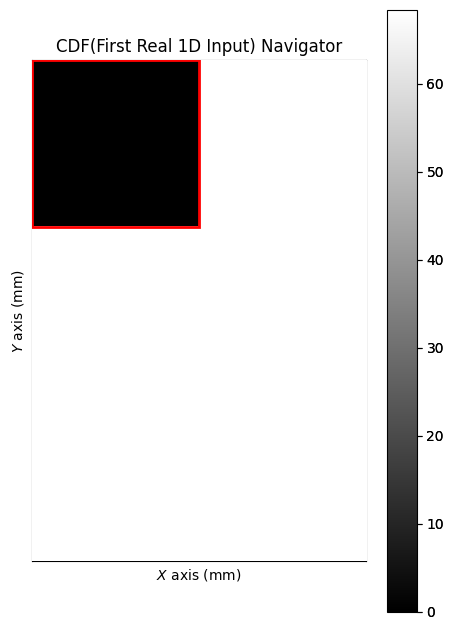

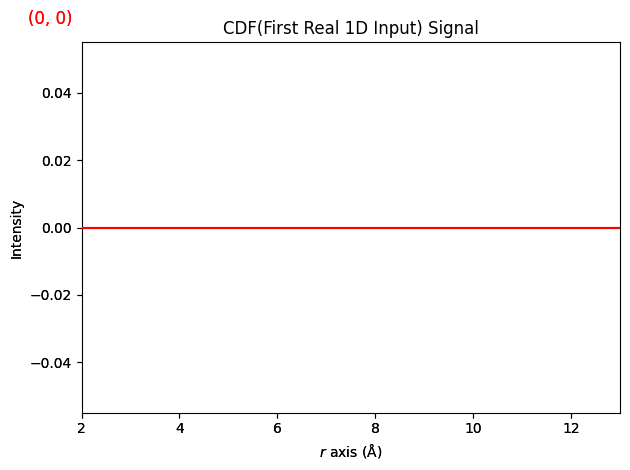

In [37]:
plt.close("all")  # Close all previous figures to release memory.

kwargs = {"axes_off": False, 
          "scalebar": False, 
          "colorbar": False, 
          "gamma": 1,
          "cmap": "jet"}
output_signal_1.plot(**kwargs)